## Dimensionality Reduction
- Two dimensions  are sufficient  for visualization of ML model (by plotting the predictions)
- There can be more than two dimensions, but it will introduce uncertainty. prioritizing the dimensions will improve the quality of predictions.


### Dimensionality Reduction techniques.
1. Feature Selection :
    - Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison.

1. Feature extraction :
    - Principal Component Analysis (PCA), Linear, Discriminant Analysis (LDA), Kernel PCA


# Principal Component Analysis - PCA
- Identify patterns in data
- Detect the correlation between variables
- Reduce the dimensions of a d-dimensional dataset by projecting it onto a **(k)-** dimensional subspace **(where x<d)**
- <a href="https://setosa.io/ev/principal-component-analysis/">Visual Explanation</a>

### Note:
- Unlike Regression PCA doesn't predicts the value, rather it Learns about the relationship between X and Y values. Find list of principal axes.


## Pre-processing

In [ ]:
# importing libraries
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

# Importing the dataset
dataset = pd.read_csv("Wine.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Applying PCA
- After applying PCA, the current features will be ir-relevant, New Features will be obtained (eg. feature 1, and feature 2).

**Note :** PCA is applied before training of dataset.
- it will be final version of your data, before training.

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
print(x_train[:5])

[[-2.17884511  1.07218467]
 [-1.80819239 -1.57822344]
 [ 1.09829474 -2.22124345]
 [-2.55584748  1.66210369]
 [ 1.85698063 -0.24157317]]


## Training the dataset

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

### Confusion matrix


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

x_test = pca.fit_transform(x_test)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


[[14  0  0]
 [ 1 13  2]
 [ 0  0  6]]


0.9166666666666666

**After applying the Classifier the dataset is divided into 3 cluster, thus 3x3 confusion matrix**


The accuracy is calculated as:

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of samples}}
$$

In this case:

$$
\text{Accuracy} = \frac{14 + 13 + 6}{14 + 0 + 0 + 1 + 13 + 2 + 0 + 0 + 6} = \frac{33}{36} \approx 91.67\%
$$

### Visualizing the training Dataset

/tmp/ipykernel_36766/3515919109.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


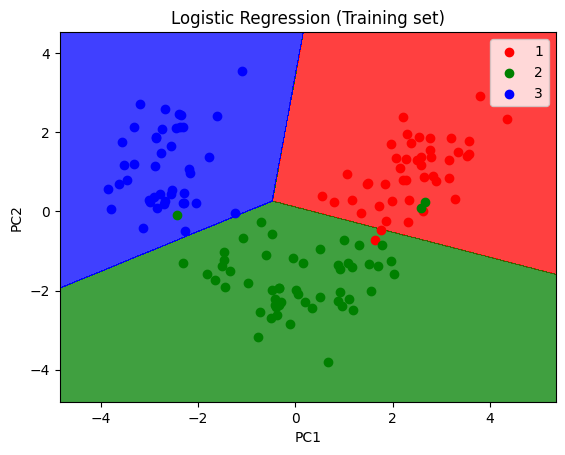

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualizing the Test Dataset

/tmp/ipykernel_36766/1015443508.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


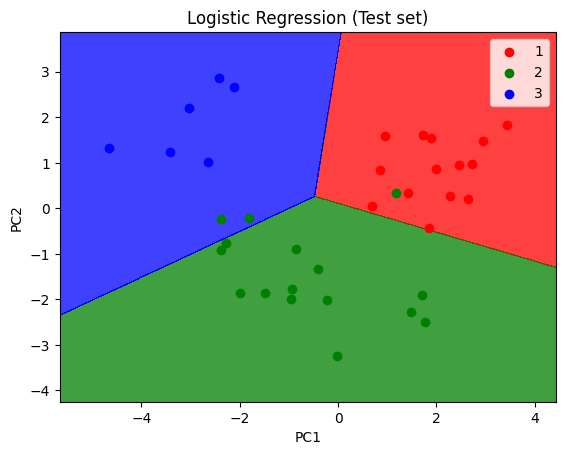

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()